<a href="https://colab.research.google.com/github/gitmystuff/DSChunks/blob/main/Bessel's_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bessel's Correction

Bessel's correction is the use of $n-1$ instead of $n$ in the denominator when calculating sample variance and standard deviation. This correction is essential because when you use a sample to estimate the variance of a larger population, using the sample mean ($\\bar{x}$) as a substitute for the true population mean ($\\mu$) introduces a slight bias.

The sample mean is, by its very nature, the center of the sample data points. This makes the distances of the data points from the sample mean seem smaller than their true distances from the population mean. Consequently, a calculation using a denominator of $n$ would **underestimate** the true population variance. Dividing by $n-1$ corrects for this underestimation, providing a more accurate, **unbiased** estimate of the population variance and standard deviation.

## Python Code Example

The following code demonstrates the difference between the biased standard deviation (using $n$) and the unbiased standard deviation (using $n-1$) in Python. The results show that the unbiased value, calculated using Bessel's correction, is slightly larger.

In [1]:
import numpy as np
import pandas as pd

# Create a sample dataset
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calculate sample standard deviation (unbiased, uses n-1)
unbiased_std = np.std(data, ddof=1)
print(f"Unbiased Standard Deviation (Bessel's Correction): {unbiased_std}")

# Calculate population standard deviation (biased, uses n)
biased_std = np.std(data, ddof=0)
print(f"Biased Standard Deviation: {biased_std}")

# Also demonstrate with pandas
df = pd.DataFrame(data)
unbiased_pd_std = df.std(ddof=1).iloc[0]
print(f"\nUnbiased Standard Deviation (pandas default): {unbiased_pd_std}")

# Show the manual calculation for the unbiased version
sample_mean = np.mean(data)
n = len(data)
manual_unbiased_std = np.sqrt(np.sum((data - sample_mean)**2) / (n - 1))
print(f"Manual Unbiased Standard Deviation: {manual_unbiased_std}")

# Show the manual calculation for the biased version
manual_biased_std = np.sqrt(np.sum((data - sample_mean)**2) / n)
print(f"Manual Biased Standard Deviation: {manual_biased_std}")

Unbiased Standard Deviation (Bessel's Correction): 3.0276503540974917
Biased Standard Deviation: 2.8722813232690143

Unbiased Standard Deviation (pandas default): 3.0276503540974917
Manual Unbiased Standard Deviation: 3.0276503540974917
Manual Biased Standard Deviation: 2.8722813232690143


## Degrees of Freedom

* https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/degrees-of-freedom/
* https://web.itu.edu.tr/~gundes/2dof.pdf

Degrees of freedom are the number of independent values that a statistical analysis can estimate. You can also think of it as the number of values that are free to vary as you estimate parameters. Degrees of freedom is a combination of how much data you have and how many parameters you need to estimate. It indicates how much independent information goes into a parameter estimate. In this vein, it’s easy to see that you want a lot of information to go into parameter estimates to obtain more precise estimates and more powerful hypothesis tests. Calculating degrees of freedom in linear regression is a bit more complicated, and I’ll keep it on the simple side. In a linear regression model, each term is an estimated parameter that uses one degree of freedom. In the regression output below, you can see how each linear regression term requires a DF. There are n = 29 observations, and the two independent variables use a total of two DF. The degrees of freedom formula for total DF = n – 1, which is 29 – 1 = 28 in our example. The degrees of freedom formula for Error DF is: n – P – 1. In our example that is 29 – 2 – 1 = 26.  P is the number of coefficients not counting the constant. The output displays the remaining 26 degrees of freedom in Error.

https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/

In [5]:
# https://www.tutorialspoint.com/generating-random-number-list-in-python
import random

def list_mean(lst):
    '''
    Returns mean of a list of integers

    Parameters:
        List
    Returns:
        Mean (Real Number)
    '''
    return sum(lst) / len(lst)

randomlist = random.sample(range(1, 11), 10)
orig_sum = sum(randomlist)
randomlist_mean = list_mean(randomlist)
print('mean of list =', randomlist_mean)
randomlist.pop()
randomlist_minus1 = sum(randomlist)
randomlist.append('?')
print(f'What number does ? have to be so that the mean of {randomlist} = {randomlist_mean}')
print(f'{randomlist_minus1} + x = {orig_sum}')
print(f'x = {orig_sum} - {randomlist_minus1} = {orig_sum - randomlist_minus1}')

mean of list = 5.5
What number does ? have to be so that the mean of [7, 3, 10, 2, 5, 1, 6, 8, 4, '?'] = 5.5
46 + x = 55
x = 55 - 46 = 9


The code does the following:

1.  **Creates a random list** of 10 unique numbers from 1 to 10.
2.  **Calculates the mean** of this list.
3.  **Removes one number** from the list.
4.  **Poses a question**: "What number does `?` have to be so that the mean of the list remains the same?"
5.  **Provides the answer**: It shows that the value of the missing number (`?`) is fixed and can be calculated directly.
6. Based on this, nine numbers are free to vary but the last number is not free to vary.

The `n-1` concept in degrees of freedom means that once you have calculated a statistic from a sample (like the mean), one of your data points is no longer independent. The remaining $n-1$ values are free to vary, but the last one is determined by the others to satisfy the known mean.

Yes, there is a formula that mathematically shows this relationship. It demonstrates how, once you know the total sum (or mean), the value of the last item in a list of $n$ numbers is no longer independent.

The total sum of a list of $n$ numbers is represented as:

$$\text{Total Sum} = \sum_{i=1}^{n} x_i$$

If you know the total sum of the $n$ numbers and the values of $n-1$ of those numbers, you can directly calculate the value of the final number ($x_n$) using the following formula:

$$x_n = \text{Total Sum} - \sum_{i=1}^{n-1} x_i$$

This equation explicitly shows that the value of the last item ($x_n$) is **fixed** and **determined** by the other $n-1$ values and the total sum. Therefore, there are only $n-1$ values that are "free" to vary. This is the core concept of **degrees of freedom**.

## Plotting Samples Without Bessel's Correction


Empty DataFrame
Columns: [sample_size, standard_deviation]
Index: []


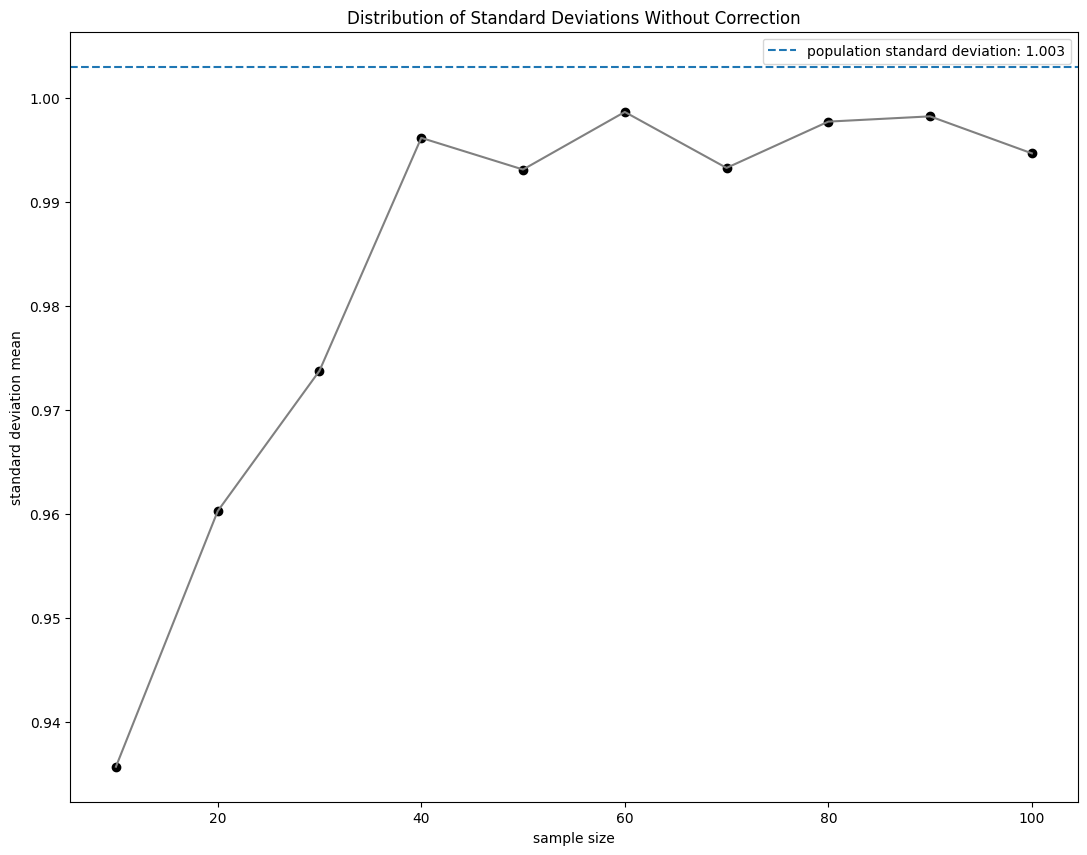

In [8]:
# without Bessel's Correction; ddof = 0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=10000)
iterations_per_sample_size = 150
sample_size_range = range(10, 105, 10)

y_means = []
for sample_size in sample_size_range:
    sample_standard_deviations = []
    for i in range(0, iterations_per_sample_size):
        random_sample_values = np.random.choice(data, size=sample_size, replace=False)
        sample_std_dev = np.std(random_sample_values, ddof=0)
        sample_standard_deviations.append(sample_std_dev)

    y_means.append(np.mean(sample_standard_deviations))

pop_std = round(np.std(data), 3)
x_range = [s for s in sample_size_range]

plt.figure(figsize=(13, 10))
plt.scatter(x_range, y_means, color='black')
plt.plot(x_range, y_means, color='gray')
plt.title('Distribution of Standard Deviations Without Correction')
plt.xlabel('sample size')
plt.ylabel('standard deviation mean')
plt.axhline(y=pop_std, label=f'population standard deviation: {pop_std.round(3)}', linestyle='--')
# plt.ylim(.5, 1.5)
plt.legend();

This code is designed to demonstrate a statistical concept: that a **biased standard deviation** (which divides by $n$) consistently **underestimates** the true standard deviation of a population, particularly with smaller sample sizes. It does this by repeatedly drawing samples, calculating their standard deviations, and then averaging the results to show the consistent downward bias.

Here's a step-by-step breakdown of what the code is doing:

---

**Setup and Initialization**

* `data = np.random.normal(loc=0, scale=1, size=10000)`: This creates a large dataset of 10,000 numbers. This dataset acts as the **population** from which all samples will be drawn. The numbers are from a normal distribution with a mean of 0 and a true standard deviation of 1.
* `iterations_per_sample_size = 150`: This variable controls how many times a sample will be drawn for each different sample size. Drawing multiple samples and averaging the results helps smooth out the randomness and show a clearer trend.
* `sample_size_range = range(10, 105, 10)`: This defines the sizes of the samples to be tested, starting at a size of 10 and increasing by 10 up to 100.
* `y_means = []`: This is an empty list that will store the average standard deviation for each sample size.

---

**The Core Simulation Loops**

The code uses a **nested loop** to run the simulation.

* **Outer Loop**: The code iterates through each `sample_size` in the `sample_size_range` (e.g., 10, 20, 30, etc.).
* **Inner Loop**: For each `sample_size`, this loop runs 150 times. In each iteration, it performs the following actions:
    * `random_sample_values = np.random.choice(data, size=sample_size, replace=False)`: A **random sample** of the specified size is drawn from the `data` population. The `replace=False` argument ensures that no number is selected more than once in a single sample.
    * `sample_std_dev = np.std(random_sample_values, ddof=0)`: The standard deviation of the current sample is calculated. The key here is `ddof=0`, which tells `numpy` to use $n$ in the denominator. This is what produces the **biased standard deviation**.
    * The calculated standard deviation is added to a list for this specific sample size.

---

**Results and Finalization**

* `y_means.append(np.mean(sample_standard_deviations))`: After the inner loop completes for a given sample size, the code calculates the **average of all the 150 standard deviations** and appends it to the `y_means` list. This average represents the typical biased standard deviation for that sample size.
* `pop_std = round(np.std(data), 3)`: This line calculates the standard deviation of the entire original `data` population. This value (which is very close to 1) is the "correct" answer that the sample calculations should be estimating.
* `x_range = [s for s in sample_size_range]`: This creates a list of sample sizes, which would typically be used for the x-axis of a plot.

In essence, the code systematically demonstrates that the average of the biased sample standard deviations will fall below the true population standard deviation, a key reason why **Bessel's correction** (dividing by $n-1$) is used to provide a better estimate.

## Plotting Samples with Correction


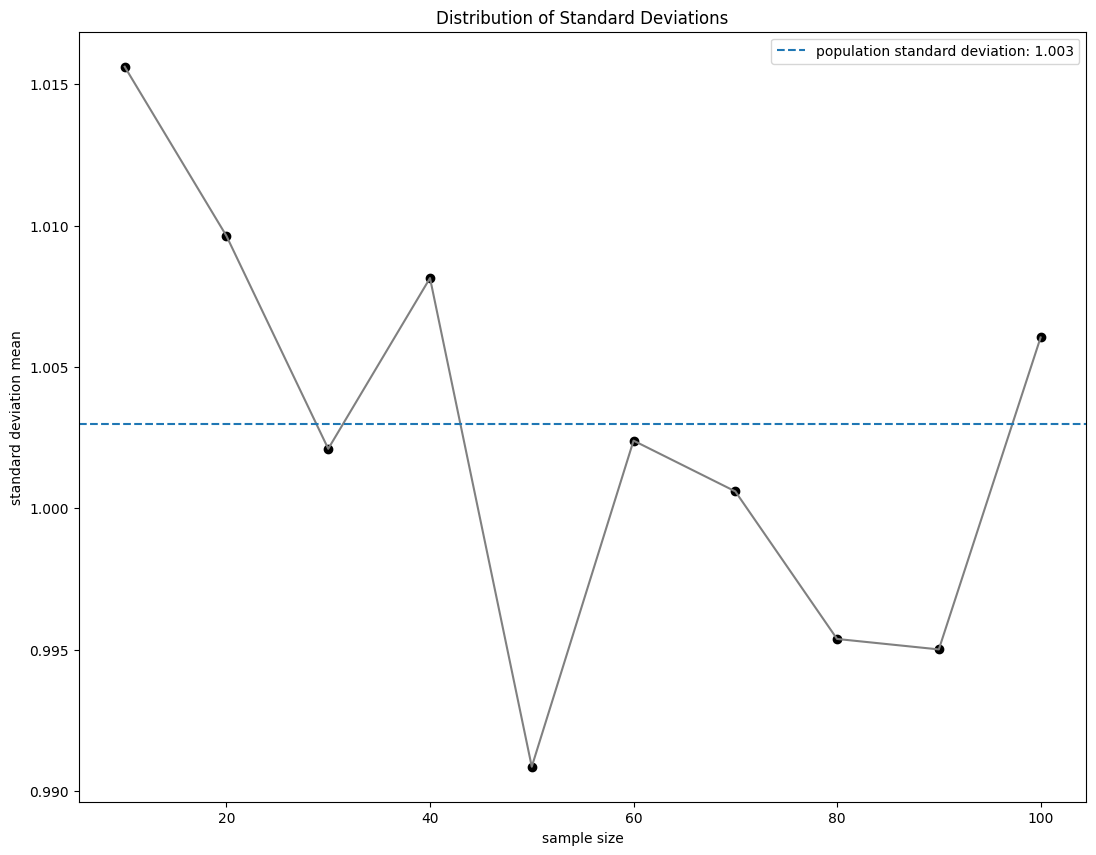

In [7]:
# with Bessel's Correction; ddof = 1
df = pd.DataFrame(data={'sample_size': [], 'standard_deviation': []})

y_means = []
for sample_size in sample_size_range:
    sample_standard_deviations = []
    for i in range(0, iterations_per_sample_size):
        random_sample_values = np.random.choice(data, size=sample_size, replace=False)
        sample_std_dev = np.std(random_sample_values, ddof=1)
        sample_standard_deviations.append(sample_std_dev)

    y_means.append(np.mean(sample_standard_deviations))

plt.figure(figsize=(13, 10))
plt.scatter(x_range, y_means, color='black')
plt.plot(x_range, y_means, color='gray')
plt.title('Distribution of Standard Deviations')
plt.xlabel('sample size')
plt.ylabel('standard deviation mean')
plt.axhline(y=pop_std, label=f'population standard deviation: {pop_std.round(3)}', linestyle='--')
# plt.ylim(.5, 1.5)
plt.legend();

Each time you use a statistic estimated from your sample to perform another calculation, you lose one degree of freedom.

For the sample standard deviation, the process is:
1.  You have $n$ independent data points.
2.  You calculate the **sample mean** from those data points. This is your one estimated statistic.
3.  You then use this sample mean to calculate the standard deviation. Because the mean is a constraint on the data, the last data point is fixed, leaving you with **$n-1$ degrees of freedom**.

Consider a different scenario. In linear regression, you might estimate both the intercept and the slope from your data. In that case, you would lose **two** degrees of freedom, and the formula would use $n-2$ in the denominator. The number you subtract is simply **the number of parameters** you estimated from your sample.